In [11]:
import pandas as pd
#!pip install xlrd wget

In [12]:
df = pd.read_excel("https://www.nordpoolgroup.com/globalassets/download-center-market-data/mcp_data_report_20-12-2018-00_00_00.xls")
df.head()

,Bid curve chart data (Reference time),20.12.2018 00:00:00,Bid curve chart data (Reference time).1,20.12.2018 01:00:00,Bid curve chart data (Reference time).2,20.12.2018 02:00:00,Bid curve chart data (Reference time).3,20.12.2018 03:00:00,Bid curve chart data (Reference time).4,20.12.2018 04:00:00,...,Bid curve chart data (Reference time).19,20.12.2018 19:00:00,Bid curve chart data (Reference time).20,20.12.2018 20:00:00,Bid curve chart data (Reference time).21,20.12.2018 21:00:00,Bid curve chart data (Reference time).22,20.12.2018 22:00:00,Bid curve chart data (Reference time).23,20.12.2018 23:00:00
0,Bid curve chart data (Currency for the values),EUR,Bid curve chart data (Currency for the values),EUR,Bid curve chart data (Currency for the values),EUR,Bid curve chart data (Currency for the values),EUR,Bid curve chart data (Currency for the values),EUR,...,Bid curve chart data (Currency for the values),EUR,Bid curve chart data (Currency for the values),EUR,Bid curve chart data (Currency for the values),EUR,Bid curve chart data (Currency for the values),EUR,Bid curve chart data (Currency for the values),EUR
1,Bid curve chart data (Reference price object ID),SP1,Bid curve chart data (Reference price object ID),SP1,Bid curve chart data (Reference price object ID),SP1,Bid curve chart data (Reference price object ID),SP1,Bid curve chart data (Reference price object ID),SP1,...,Bid curve chart data (Reference price object ID),SP1,Bid curve chart data (Reference price object ID),SP1,Bid curve chart data (Reference price object ID),SP1,Bid curve chart data (Reference price object ID),SP1,Bid curve chart data (Reference price object ID),SP1
2,Bid curve chart data (Volume for accepted bloc...,390.5,Bid curve chart data (Volume for accepted bloc...,420.5,Bid curve chart data (Volume for accepted bloc...,420.5,Bid curve chart data (Volume for accepted bloc...,395.5,Bid curve chart data (Volume for accepted bloc...,395.5,...,Bid curve chart data (Volume for accepted bloc...,288,Bid curve chart data (Volume for accepted bloc...,389,Bid curve chart data (Volume for accepted bloc...,391.5,Bid curve chart data (Volume for accepted bloc...,426.5,Bid curve chart data (Volume for accepted bloc...,426.5
3,Bid curve chart data (Volume for accepted bloc...,3278.7,Bid curve chart data (Volume for accepted bloc...,3278.7,Bid curve chart data (Volume for accepted bloc...,3278.7,Bid curve chart data (Volume for accepted bloc...,3277.4,Bid curve chart data (Volume for accepted bloc...,3203.2,...,Bid curve chart data (Volume for accepted bloc...,3369.2,Bid curve chart data (Volume for accepted bloc...,2955.2,Bid curve chart data (Volume for accepted bloc...,2850.3,Bid curve chart data (Volume for accepted bloc...,2799.8,Bid curve chart data (Volume for accepted bloc...,2776.3
4,Bid curve chart data (Volume for net flows),798.9,Bid curve chart data (Volume for net flows),685.3,Bid curve chart data (Volume for net flows),39,Bid curve chart data (Volume for net flows),1290.5,Bid curve chart data (Volume for net flows),1218.4,...,Bid curve chart data (Volume for net flows),-3276.5,Bid curve chart data (Volume for net flows),-1033.2,Bid curve chart data (Volume for net flows),422.3,Bid curve chart data (Volume for net flows),704.1,Bid curve chart data (Volume for net flows),2664.4


In [13]:
import datetime
def date_range(start_date, end_date):
    delta = datetime.timedelta(days=1)
    d = start_date
    while d <= end_date:
        yield(d)
        d += delta
        
[d.strftime("%Y-%m-%d") for d in date_range(start_date = datetime.date(2009, 5, 25), end_date = datetime.date(2009, 5, 30))]

['2009-05-25',
 '2009-05-26',
 '2009-05-27',
 '2009-05-28',
 '2009-05-29',
 '2009-05-30']

In [14]:
#!pip install wget
import wget
import time

#start_date = datetime.date(2014, 7, 1)
start_date = datetime.date(2020, 4, 14)
end_date = datetime.date.today()

for date in date_range(start_date, end_date):
    try:
        #https://www.nordpoolgroup.com/globalassets/download-center-market-data/mcp_data_report_20-12-2018-00_00_00.xls
        url = "https://www.nordpoolgroup.com/globalassets/download-center-market-data/mcp_data_report_%s-00_00_00.xls" % date.strftime("%d-%m-%Y")
        file_name = wget.download(url)
        print(file_name)
        time.sleep(0.1)
    except:
        print(url + " FAILED!")
    else:
        print(file_name)


https://www.nordpoolgroup.com/globalassets/download-center-market-data/mcp_data_report_14-04-2020-00_00_00.xls FAILED!
https://www.nordpoolgroup.com/globalassets/download-center-market-data/mcp_data_report_15-04-2020-00_00_00.xls FAILED!


In [15]:
import glob
import json
import datetime
from dateutil import parser

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML, Image, Video

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-pastel')

In [16]:
def convert_timeslice_to_buy_sell_curve(df1):
    df1 = df1.values.tolist()
    
    data = {
        "buy_curve": [],
        "sell_curve": [],
        "accepted_buy_volume": None,          # Accepted advance (e.g. block) orders
        "accepted_sell_volume": None,         # Accepted advance (e.g. block) orders
        #"nonaccepted_buy_volume": None,      # Only available before 2016
        #"nonaccepted_sell_volume": None,     # Only available before 2016
        "imported_volume_volume": None        # Can be negative
    }

    is_buy_or_sell_curve = False
    is_buy_curve = True

    last_recorded_volume = 0.0
    last_recorded_price = 0.0
    
    for i, row in enumerate(df1):
        if not is_buy_or_sell_curve:
            if row[0] == "Buy curve":
                is_buy_or_sell_curve = True
                
            elif row[0] == "Bid curve chart data (Volume for accepted blocks buy)":
                data["accepted_buy_volume"] = float(row[1])
            
            elif row[0] == "Bid curve chart data (Volume for accepted blocks sell)":
                data["accepted_sell_volume"] = float(row[1])
            
            #elif row[0] == "Bid curve chart data (Volume for non-accepted blocks buy)":
            #    data["nonaccepted_buy_volume"] = float(row[1])
            #
            #elif row[0] == "Bid curve chart data (Volume for non-accepted blocks sell)":
            #    data["nonaccepted_sell_volume"] = float(row[1])
            
            elif row[0] == "Bid curve chart data (Volume for net flows)":
                data["imported_volume_volume"] = float(row[1])
            
            else:
                continue
        else:
            if row[0] == "Sell curve":
                is_buy_curve = False
                continue

            elif row[0] == "Price value":
                price = float(row[1])
                # Wait for volume to record it

            elif row[0] == "Volume value":
                volume = float(row[1])
                
                # Record setting if significantly changed
                if (abs(volume - last_recorded_volume) > 1000    #MW
                    or abs(price - last_recorded_price) > 1): # EUR/MWh
                    
                    last_recorded_volume = volume
                    last_recorded_price = price

                    if is_buy_curve:
                        data["buy_curve"].append((price, volume))
                    else:
                        data["sell_curve"].append((price, volume))

            elif str(row[0]) == "nan":
                break 

            else:
                print(row)
                raise Exception("Unknown value in row %i: %s" % (i, row[0]))

    data["buy_curve"] = pd.DataFrame(data["buy_curve"], columns=["Price", "Volume"])
    data["sell_curve"] = pd.DataFrame(data["sell_curve"], columns=["Price", "Volume"])
    
    return data



In [17]:
def find_intersection(buy_curve, sell_curve):
    price = None
    volume = None

    i = 0; j = 0
    while i<len(buy_curve) and j<len(sell_curve):

        #print(i, j, buy_curve.iloc[i]["Volume"], sell_curve.iloc[j]["Volume"], buy_curve.iloc[i]["Price"], sell_curve.iloc[j]["Price"])

        if buy_curve.iloc[i]["Volume"] < sell_curve.iloc[j]["Volume"]:
            price = buy_curve.iloc[i]["Price"]
            volume = buy_curve.iloc[i]["Volume"]
            break
        else:
            if buy_curve.iloc[i]["Price"] < sell_curve.iloc[j]["Price"]:
                i += 1
            else:
                j += 1

    return volume, price

In [18]:
buy_and_sell_curves = []

files = glob.glob("mcp_data_report_*")
files = sorted(files, key=lambda file: parser.parse(file[16:26], dayfirst=True)) # Uten data/
#files = sorted(files, key=lambda file: parser.parse(file[21:31], dayfirst=True))
#files = files[-2:]

for index, file in enumerate(files):
    progress = "{}/{} ".format(index+1, len(files))
    
    try:
        df = pd.read_excel(file)
        
        for i in range(24):
            date_time_str = df.iloc[:,(i*2):(i*2+2)].columns[1]
            date_time = parser.parse(date_time_str[:19], dayfirst=True)
            data = convert_timeslice_to_buy_sell_curve(df.iloc[:,(i*2):(i*2+2)])
            
            data["buy_curve"]["Volume"] = data["buy_curve"]["Volume"] + data["accepted_buy_volume"] - data["imported_volume_volume"]
            data["sell_curve"]["Volume"] = data["sell_curve"]["Volume"] + data["accepted_sell_volume"]
            
            volume, price = find_intersection(data["buy_curve"], data["sell_curve"])
            
            # New data
            data["volume"] = volume
            data["price"] = price
            data["date_time"] = date_time
            
            buy_and_sell_curves.append(data)
            
    except Exception as e:
        print(e)
        print(progress + file + " FAILED!")
    else:
        print(progress + file)
        #print(buy_and_sell_curves[index*24][0], buy_and_sell_curves[index*24][3])
        #print(buy_and_sell_curves[index*24+1][0], buy_and_sell_curves[index*24+1][3])
    
buy_and_sell_curves = sorted(buy_and_sell_curves, key=lambda item: item["date_time"])
#buy_and_sell_curves[17]

In [19]:
new_buy_and_sell_curves = buy_and_sell_curves

In [20]:
def myconverter(o):
    if isinstance(o, datetime.datetime):
        return o.__str__()
    if isinstance(o, pd.DataFrame):
        return o.values.tolist()

j = json.dumps(new_buy_and_sell_curves, default = myconverter)

with open('gitignore/data-justnew.json', 'w') as file:
    file.write(j)

In [21]:
first_year = buy_and_sell_curves[0]["date_time"].year
last_year = buy_and_sell_curves[-1]["date_time"].year
years = list(range(first_year, last_year+1))
years

IndexError: list index out of range

In [9]:
import json
import datetime
from dateutil import parser

def process_json_file(filename):
    with open(filename, 'r') as file:
        buy_and_sell_curves_raw = json.load(file)
        for buy_and_sell_curve in buy_and_sell_curves_raw:
            buy_and_sell_curve["date_time"] = parser.parse(buy_and_sell_curve["date_time"], yearfirst=True)
            buy_and_sell_curve["buy_curve"] = pd.DataFrame(buy_and_sell_curve["buy_curve"], columns=["Price", "Volume"])
            buy_and_sell_curve["sell_curve"] = pd.DataFrame(buy_and_sell_curve["sell_curve"], columns=["Price", "Volume"])

            date_time = buy_and_sell_curve["date_time"]
            if date_time not in buy_and_sell_curves_date:
                buy_and_sell_curves_date[date_time] = True
                buy_and_sell_curves.append(buy_and_sell_curve)
            else:
                print(date_time, "duplicate")

In [11]:
#buy_and_sell_curves = []
buy_and_sell_curves_date = {}

# Add new date_times in buy_and_sell_curves to buy_and_sell_curves_date
for buy_and_sell_curve in buy_and_sell_curves:
    date_time = buy_and_sell_curve["date_time"]
    if date_time not in buy_and_sell_curves_date:
        buy_and_sell_curves_date[date_time] = True

# Add existing data
for year in years:
    process_json_file('gitignore/data-%i.json' % year)
    
buy_and_sell_curves = sorted(buy_and_sell_curves, key=lambda item: item["date_time"])

In [3]:
!cp gitignore/data-2020.json gitignore/data-2020-backup.json

In [ ]:
for year in years:
    
    from_date = datetime.datetime(year, 1, 1, 0, 0)
    to_date = datetime.datetime(year, 12, 31, 23, 0)

    buy_and_sell_curve_for_year = [
        buy_and_sell_curve for buy_and_sell_curve in buy_and_sell_curves 
            if   buy_and_sell_curve["date_time"] >= from_date
            and  buy_and_sell_curve["date_time"] <= to_date
    ]

    j = json.dumps(buy_and_sell_curve_for_year, default = myconverter)

    with open('gitignore/data-%i.json' % year, 'w') as file:
        file.write(j)
        
    print("%i finished" % year)

In [3]:
import glob
import json
import datetime
from dateutil import parser

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML, Image, Video

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-pastel')
#plt.style.use('style.mplstyle')

#!brew install ffmpeg      # MPE4 animations
#!brew install imagemagick  # Gif animations

def process_json_file(filename):
    with open(filename, 'r') as file:
        buy_and_sell_curves_raw = json.load(file)
        for buy_and_sell_curve in buy_and_sell_curves_raw:
            buy_and_sell_curve["date_time"] = parser.parse(buy_and_sell_curve["date_time"], yearfirst=True)
            buy_and_sell_curve["buy_curve"] = pd.DataFrame(buy_and_sell_curve["buy_curve"], columns=["Price", "Volume"])
            buy_and_sell_curve["sell_curve"] = pd.DataFrame(buy_and_sell_curve["sell_curve"], columns=["Price", "Volume"])

            date_time = buy_and_sell_curve["date_time"]
            if date_time not in buy_and_sell_curves_date:
                buy_and_sell_curves_date[date_time] = True
                buy_and_sell_curves.append(buy_and_sell_curve)
            else:
                print(date_time, "duplicate")

In [4]:
buy_and_sell_curves = []
buy_and_sell_curves_date = {}

years = [2020]

for year in years:
    process_json_file('gitignore/data-%i.json' % year)

In [5]:
class Plot():
    def __init__(
                self, 
                buy_and_sell_curves,
                title,
                title2,
                source="Jon Tingvold",
                draw_past_interactions=True, 
                dpi=200, 
                points_back_in_time=24*7
            ):

        self.buy_and_sell_curves = buy_and_sell_curves
        self.draw_past_interactions = draw_past_interactions
        self.points_back_in_time = points_back_in_time
        
        # Variables
        self.fig = None
        self.ax = None
        self.line1 = None
        self.line2 = None
        self.line3 = None
        self.intersections = None
        self.past_intersections = None

        self.text_date = None
        self.text_price = None
        self.text_volume = None
        self.text_imported = None

        self.past_interacton_volume = None
        self.past_interacton_price = None
        
        #plt.rcParams['savefig.pad_inches'] = 0.4
        plt.rcParams["font.family"] = "Gill Sans"
        plt.rcParams["figure.facecolor"] = "ffffff"
        plt.rcParams["axes.facecolor"] = "ffffff"
        
        self.fig = plt.figure(figsize=(6.4, 3.6), dpi=dpi)
        self.ax = plt.axes(xlim=(0, 80000), ylim=(-20, 100))
        
        
        plt.margins(0.4, tight=False)

        self.ax.spines['top'].set_visible(False)
        self.ax.spines['right'].set_visible(False)
        self.ax.spines['bottom'].set_visible(True)
        self.ax.spines['left'].set_visible(True)
        
        self.ax.axhline(y=0, color="lightgray", lw=0.5)

        self.fig.text(0.05, 0.90, title, fontsize="x-large", weight="bold")
        self.fig.text(0.05, 0.85, title2)
        self.fig.text(0.90, 0.05, source, ha="right")
        plt.subplots_adjust(top=0.75, bottom=0.2)

        plt.xlabel("Volume (MW)")
        plt.ylabel("Power price (EUR/MWh)")

        self.text_date = self.ax.text(78000, 96, "", ha="right")
        self.text_price = self.ax.text(78000, 86, "", ha="right")
        self.text_volume = self.ax.text(78000, 76, "", ha="right")
        self.text_imported = self.ax.text(78000, 66, "", ha="right")

        self.line1, = self.ax.plot([], [], lw=3)
        self.line2, = self.ax.plot([], [], lw=1, color = '#94C7FD')
        self.line3, = self.ax.plot([], [], lw=3)
        
        self.past_interacton_volume = []
        self.past_interacton_price = []
        self.past_intersections, = self.ax.plot([], [], 'o', alpha=0.1, markersize=3)
        self.intersections, = self.ax.plot([], [], 'o')
        
        self.line1.set_label('Buy curve')
        self.line2.set_label('/w ex-/import')
        self.line3.set_label('Sell curve')
        self.ax.legend(loc='lower right', frameon=False)

    def init(self):
        self.line1.set_data([], [])
        self.line2.set_data([], [])
        self.line3.set_data([], [])
        self.past_intersections.set_data([], [])
        self.intersections.set_data([], [])

        return self.line1, self.line2, self.line3, self.past_intersections, self.intersections,

    def animate(self, i):
        date_time = self.buy_and_sell_curves[i]["date_time"]
        buy_curve = self.buy_and_sell_curves[i]["buy_curve"]
        sell_curve = self.buy_and_sell_curves[i]["sell_curve"]
        
        imported_volume = self.buy_and_sell_curves[i]["imported_volume_volume"]
        accepted_buy_volume = self.buy_and_sell_curves[i]["accepted_buy_volume"]
        accepted_sell_volume = self.buy_and_sell_curves[i]["accepted_sell_volume"]
        volume = self.buy_and_sell_curves[i]["volume"]
        price = self.buy_and_sell_curves[i]["price"]

        date_time_str = date_time.strftime("%Y-%m-%d %H:%M")
        self.text_date.set_text(date_time_str)
        self.text_price.set_text(" %4.1f EUR/MWh" % price)
        self.text_volume.set_text("%d MW produced" % round(volume, -3))
        self.text_imported.set_text("%d MW exported" % round(-1 * imported_volume, -2))

        self.line1.set_data(buy_curve["Volume"] + imported_volume, buy_curve["Price"])
        self.line2.set_data(buy_curve["Volume"], buy_curve["Price"])
        self.line3.set_data(sell_curve["Volume"], sell_curve["Price"])

        if self.draw_past_interactions:
            self.past_intersections.set_data(self.past_interacton_volume[-1*self.points_back_in_time:], self.past_interacton_price[-1*self.points_back_in_time:])
            self.past_interacton_volume.append(volume)
            self.past_interacton_price.append(price)

        self.intersections.set_data(volume, price)

        return self.line1, self.line2, self.line3, self.past_intersections, self.intersections,
        
def save_image(buy_and_sell_curves, path, title, title2, dpi=100):
    plot = Plot(buy_and_sell_curves, title, title2, dpi=dpi)
    plot.animate(0)
    plot.fig.savefig(path, dpi=200)
    plt.close()

def save_and_render_video(buy_and_sell_curves, path, title, title2, draw_past_interactions=False, points_back_in_time=7*24):
    plot = Plot(buy_and_sell_curves, title, title2, draw_past_interactions=draw_past_interactions, points_back_in_time=points_back_in_time)
    frames = len(buy_and_sell_curves)
    anim = animation.FuncAnimation(plot.fig, plot.animate, init_func=plot.init, frames=frames, blit=True)
    anim.save(path, writer = animation.FFMpegWriter(fps = 10, codec='h264'))
    plt.close()
    
def save_and_render_gif(buy_and_sell_curves, path, title, title2, draw_past_interactions=False, points_back_in_time=7*24):
    plot = Plot(buy_and_sell_curves, title, title2, draw_past_interactions=draw_past_interactions, points_back_in_time=points_back_in_time)
    frames = len(buy_and_sell_curves)
    anim = animation.FuncAnimation(plot.fig, plot.animate, init_func=plot.init, frames=frames, blit=True)
    anim.save(path, writer = animation.ImageMagickWriter(fps = 10, codec='h264'))
    plt.close()

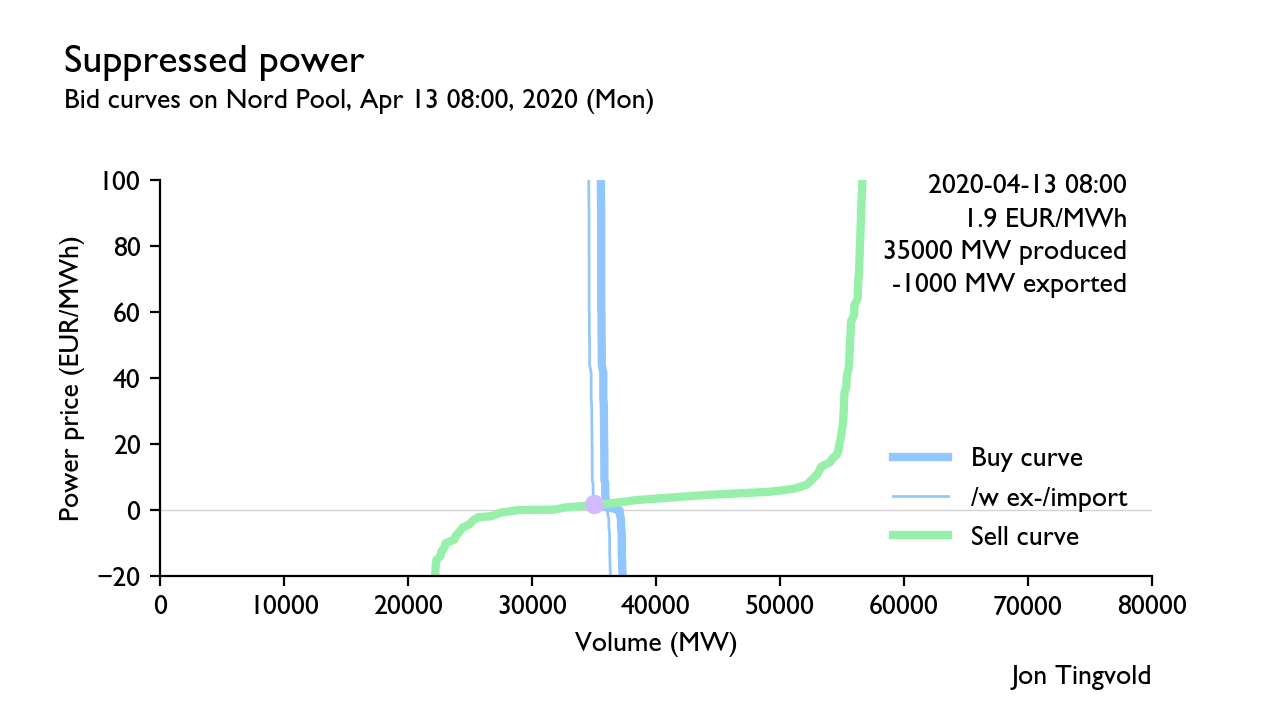

In [6]:
# PNG image of last day 8:00

last_hour = buy_and_sell_curves[-1]["date_time"]

date_time = datetime.datetime(last_hour.year, last_hour.month, last_hour.day, 8, 0)

title = "Suppressed power"
title2 = "Bid curves on Nord Pool, %s" % date_time.strftime('%b %d %H:%M, %Y (%a)')
path = "animations/Last day 8am.png"

buy_and_sell_curve_for_plot = [buy_and_sell_curve for buy_and_sell_curve in buy_and_sell_curves 
     if   buy_and_sell_curve["date_time"] == date_time]

save_image(buy_and_sell_curve_for_plot, path, title, title2, dpi=100)
Image(path, retina=True)

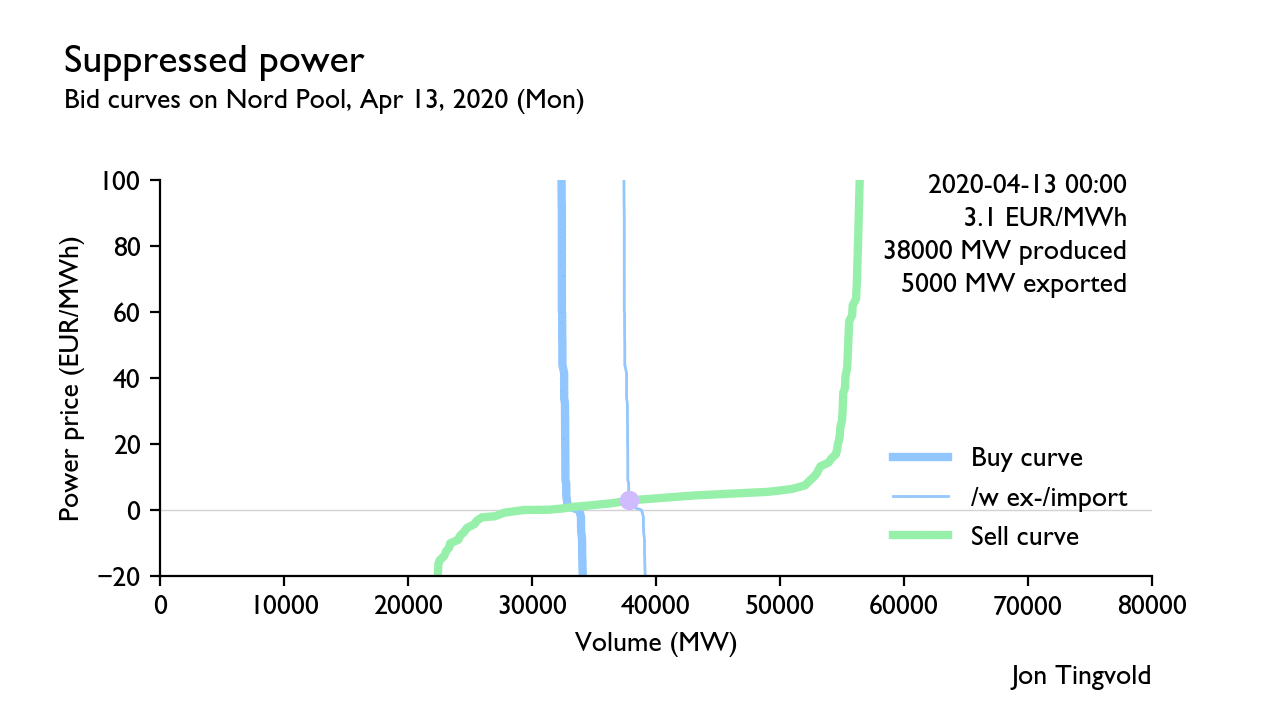

In [26]:
# Gif animation of last day

last_hour = buy_and_sell_curves[-1]["date_time"]

from_date = datetime.datetime(last_hour.year, last_hour.month, last_hour.day, 0, 0)
to_date = datetime.datetime(last_hour.year, last_hour.month, last_hour.day, 23, 0)

title = "Suppressed power"
title2 = "Bid curves on Nord Pool, %s" % from_date.strftime('%b %d, %Y (%a)')
path = "animations/Last day.gif"

buy_and_sell_curve_for_plot = [
    buy_and_sell_curve for buy_and_sell_curve in buy_and_sell_curves 
        if   buy_and_sell_curve["date_time"] >= from_date
        and  buy_and_sell_curve["date_time"] <= to_date
]

save_and_render_gif(buy_and_sell_curve_for_plot, path, title, title2, draw_past_interactions=False)
Image(path, retina=True)

In [27]:
# Last week

last_hour = buy_and_sell_curves[-1]["date_time"]

from_date = last_hour - datetime.timedelta(days=(last_hour.weekday() + 7)) - datetime.timedelta(hours=last_hour.hour)
to_date = last_hour - datetime.timedelta(days=(last_hour.weekday() + 1))

title = "Supply and demand"
title2 = "Bid curves on Nord Pool, %s–%s (Mon–Sun)" % (from_date.strftime('%B %d'), to_date.strftime('%B %d, %Y'))
path = "animations/Last week.mp4"

buy_and_sell_curve_for_plot = [buy_and_sell_curve for buy_and_sell_curve in buy_and_sell_curves 
     if   buy_and_sell_curve["date_time"] >= from_date
     and  buy_and_sell_curve["date_time"] <= to_date]

save_and_render_video(buy_and_sell_curve_for_plot, path, title=title, title2=title2, draw_past_interactions=True, points_back_in_time=7*24)
HTML("""<video src="{}" width="640" height="360" controls="true">""".format(path))